In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from collections import Counter

In [2]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TASK = 'csv/test.csv'

In [3]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
task = pd.read_csv(PATH_TO_TASK, index_col='PassengerId')

In [4]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Age'].isna()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [6]:
train.loc[[5,6]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [7]:
y = train['Survived']

In [8]:
# train.drop(columns=['Survived'], axis=1, inplace=True)
# train['Survived'] = y

In [9]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train['Pclass'] = train['Pclass'].astype('category')
task['Pclass'] = task['Pclass'].astype('category')

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train['Sex'].replace({'male' :0, 'female' :1}, inplace=True)
task['Sex'].replace({'male' :0, 'female' :1}, inplace=True)

In [13]:
train['Age'].fillna(train[~train['Age'].isna()]['Age'].median(), inplace=True)
task['Age'].fillna(train[~train['Age'].isna()]['Age'].median(), inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 109.9+ KB


In [15]:
train['Cabin'] = np.where(train['Cabin'].isna(), 0, 1)
task['Cabin'] = np.where(task['Cabin'].isna(), 0, 1)

In [16]:
train.info()
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    int64   
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 109.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null   

In [17]:
task['Fare'].fillna(train['Fare'].median(), inplace=True)

In [18]:
train.info()
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    int64   
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 109.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null   

In [19]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [20]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [21]:
train.info()
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    int64   
 10  Embarked  891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 109.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null   

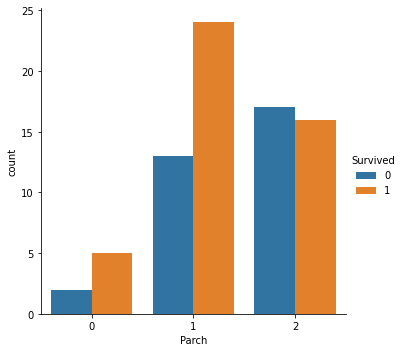

In [22]:
sns.catplot(data=train[(train['Age'] <= 14)], x='Parch', hue='Survived', kind='count')

In [23]:
train['Child'] = np.where((train['Parch'] > 0) | (train['Age'] <= 14), 1, 0)
task['Child'] = np.where((task['Parch'] > 0) | (task['Age'] <= 14), 1, 0)

In [24]:
train = train.reindex(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Child', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'])
task = task.reindex(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Child', 'Ticket', 'Fare',
       'Cabin', 'Embarked'])

In [25]:
train['Parent'] = np.where((train['Child'] == 1) & ((train['Parch'] > 0) | train['Ticket'].duplicated()), 1, 0)
task['Parent'] = np.where((task['Child'] == 1) & (task['Parch'] > 0 | task['Ticket'].duplicated()), 1, 0)

In [26]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Child', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Survived', 'Parent'],
      dtype='object')

In [27]:
train = train.reindex(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Parent', 'Child', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Survived'])
task = task.reindex(columns=['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Parent', 'Child', 'Ticket',
       'Fare', 'Cabin', 'Embarked'])

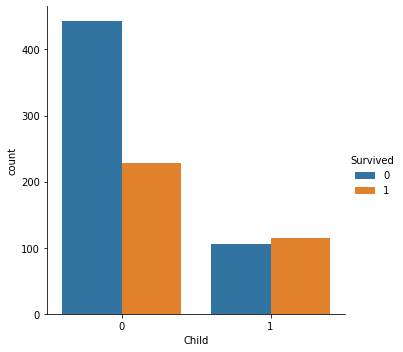

In [28]:
sns.catplot(data=train, x='Child', hue='Survived', kind='count')

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:>

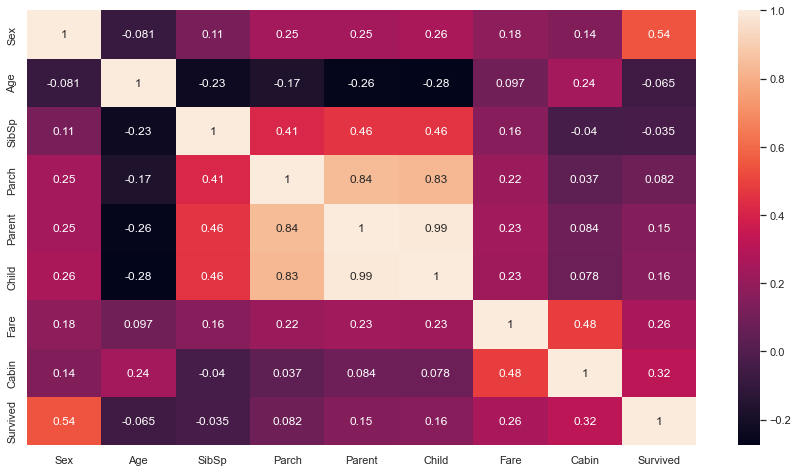

In [30]:
sns.heatmap(train.corr(), annot = True)

In [31]:
train[(train['Child'] == 1) & (train['Parent'] == 0)]

,Pclass,Name,Sex,Age,SibSp,Parch,Parent,Child,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,,,
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,0,1,237736,30.0708,0,C,1
15,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,0,1,350406,7.8542,0,S,0
40,3,"Nicola-Yarred, Miss. Jamila",1,14.0,1,0,0,1,2651,11.2417,0,C,1
781,3,"Ayoub, Miss. Banoura",1,13.0,0,0,0,1,2687,7.2292,0,C,1


In [32]:
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
task.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [33]:
train.info()
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Sex       891 non-null    int64   
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Parent    891 non-null    int64   
 6   Child     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    int64   
 9   Embarked  891 non-null    object  
 10  Survived  891 non-null    int64   
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 109.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    int64   
 2   Age       418 non-null   

In [34]:
train = pd.get_dummies(train)
task = pd.get_dummies(task)

In [35]:
train.info()
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Parent      891 non-null    int64  
 5   Child       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Cabin       891 non-null    int64  
 8   Survived    891 non-null    int64  
 9   Pclass_1    891 non-null    uint8  
 10  Pclass_2    891 non-null    uint8  
 11  Pclass_3    891 non-null    uint8  
 12  Embarked_C  891 non-null    uint8  
 13  Embarked_Q  891 non-null    uint8  
 14  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(7), uint8(6)
memory usage: 107.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column      Non-Null Co

In [36]:
train.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Parent', 'Child', 'Fare', 'Cabin',
       'Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [37]:
train = train.reindex(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Parent', 'Child', 'Fare', 'Cabin',
                'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
                'Embarked_Q', 'Embarked_S'])

<AxesSubplot:>

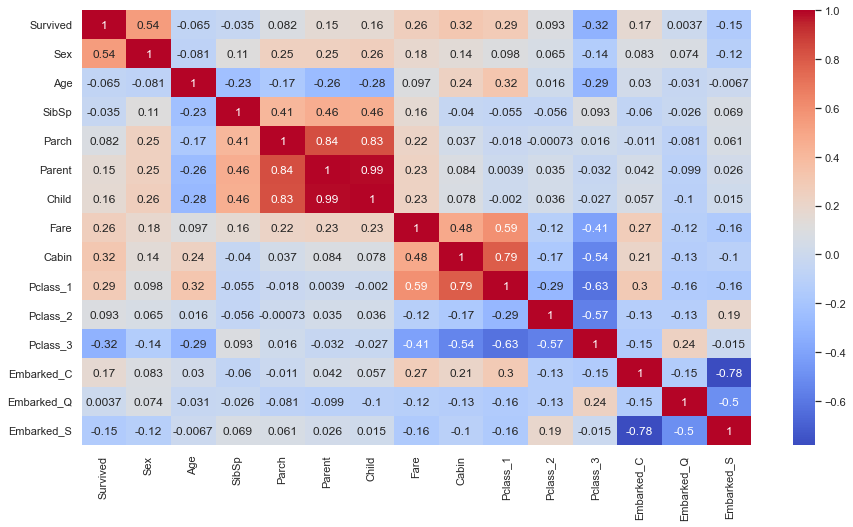

In [38]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

----
# machine learning
___

In [39]:
train.describe()

,Survived,Sex,Age,SibSp,Parch,Parent,Child,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.352413,29.361582,0.523008,0.381594,0.242424,0.246914,32.204208,0.228956,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028
std,0.486592,0.477990,13.019697,1.102743,0.806057,0.428790,0.431458,49.693429,0.420397,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# train.drop(columns='Parch', axis=1, inplace=True)
# task.drop(columns='Parch', axis=1, inplace=True)

In [41]:
def my_logr(train):
    answer = train['Survived']
    data = train.drop(columns=['Survived'])
    x_train, x_test, y_train, y_test = train_test_split(data, answer, test_size=0.25, random_state=4, stratify=y, shuffle=True, )
    
#     cols_for_scale = ['Age', 'SibSp']
#     scaler = MinMaxScaler()
#     x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])
#     x_test[cols_for_scale] = scaler.transform(x_test[cols_for_scale])
    
    lr = LogisticRegression(max_iter=500)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    
    print(f'--> accuracy_score = {accuracy_score(y_pred, y_test)}')
    
    answer = Counter([i[0] == i[1] for i in zip(y_test, y_pred)])
    print(f'--> {answer}, {round((answer[0] / (answer[1] + answer[0])) * 100, ndigits=2)}% errors')
    
    return lr

In [42]:
data = my_logr(train)

--> accuracy_score = 0.8251121076233184
--> Counter({True: 184, False: 39}), 17.49% errors


In [43]:
# plt.barh(data[0].columns, data[5].coef_.flatten())

TypeError: 'LogisticRegression' object is not subscriptable

In [44]:
train.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Parent', 'Child', 'Fare',
       'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [45]:
train2 = train.drop(columns=['Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2'], axis=1)
task2 = task.drop(columns=['Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2'], axis=1)

In [46]:
data2 = my_logr(train2)

--> accuracy_score = 0.8430493273542601
--> Counter({True: 188, False: 35}), 15.7% errors


In [48]:
# plt.barh(data2[0].columns, data2[5].coef_.flatten())

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
def my_rf(train):
    answer = train['Survived']
    data = train.drop(columns=['Survived'])
    x_train, x_test, y_train, y_test = train_test_split(data, answer, test_size=0.25, random_state=5)
    
    rfc = RandomForestClassifier(max_depth=10, max_leaf_nodes=25, n_estimators=200)
    rfc.fit(x_train, y_train)
    
    y_pred = rfc.predict(x_test)
    
    print(f'--> accuracy_score = {accuracy_score(y_pred, y_test)}')
    
    answer = Counter([i[0] == i[1] for i in zip(y_test, y_pred)])
    print(f'--> {answer}, {round((answer[0] / (answer[1] + answer[0])) * 100, ndigits=2)}% errors')
    return rfc

In [51]:
rfc1 = my_rf(train)

--> accuracy_score = 0.8340807174887892
--> Counter({True: 186, False: 37}), 16.59% errors


In [68]:
rfc2 = my_rf(train2)

--> accuracy_score = 0.8430493273542601
--> Counter({True: 188, False: 35}), 15.7% errors


In [53]:
y_answer_1 = rfc1.predict(task)

In [54]:
y_answer_2 = rfc2.predict(task2)

In [69]:
y_answer_3 = rfc2.predict(task2)

In [56]:
task.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [70]:
output = pd.DataFrame({'PassengerId': task.index, 'Survived': y_answer_1})

In [71]:
output.to_csv('submission.csv', index=False)

In [72]:
pd.Series([i[0] == i[1] for i in zip(y_answer_1, y_answer_3)]).value_counts()

True     372
False     46
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

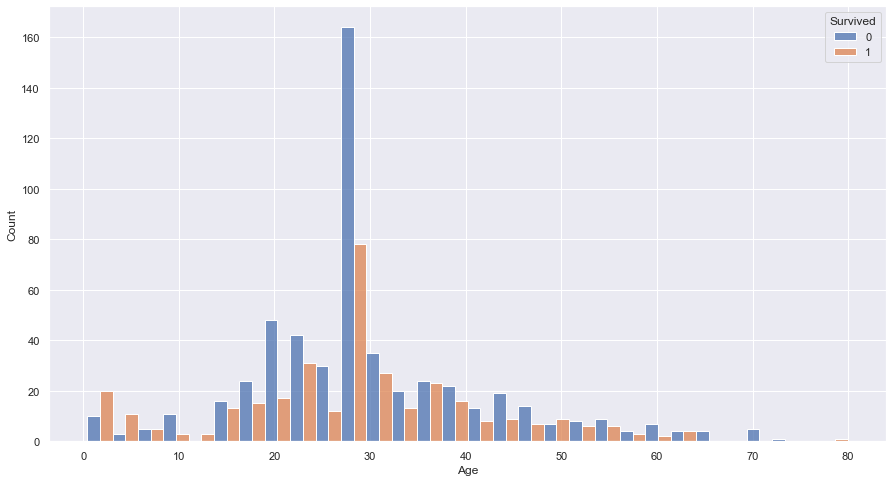

In [60]:
sns.histplot(data=train, x='Age', hue='Survived', multiple = 'dodge')

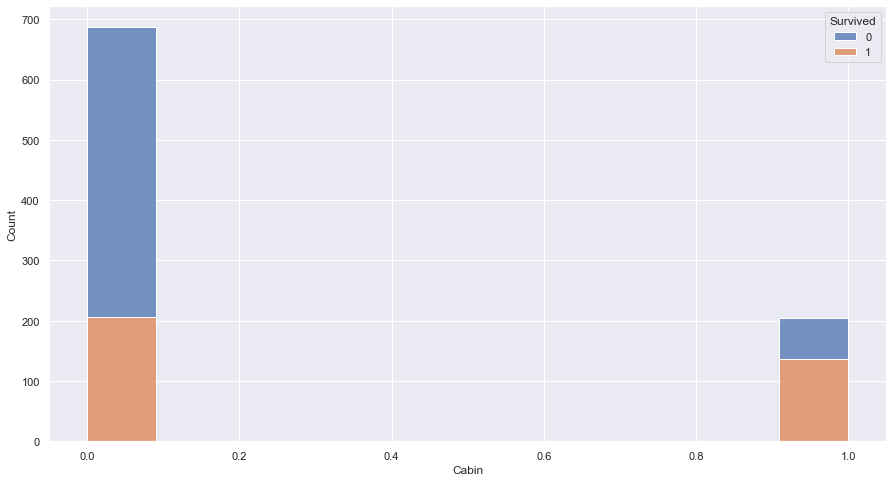

In [61]:
sns.histplot(data = train, x = train['Cabin'], hue = 'Survived', multiple = 'stack');

In [62]:
answer = train['Survived']
data = train.drop(columns=['Survived'])
X_train, X_valid, y_train, y_valid = train_test_split(data, answer, test_size=0.25, random_state=5)

In [63]:
from sklearn.model_selection import GridSearchCV

param = [
    {'n_estimators': [100, 200, 300, 400, 450, 500], 
     'max_depth': [3, 4, 6, 8, 10, 12], 
     'max_leaf_nodes': [15, 20, 25]}, 
]


rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rf.fit(X_train, y_train)

rf_best = gs_rf.best_estimator_
gs_rf.best_estimator_, gs_rf.score(X_valid, y_valid), gs_rf.score(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


(RandomForestClassifier(max_depth=10, max_leaf_nodes=25, n_estimators=200),
 0.8385650224215246,
 0.8712574850299402)

In [4]:
(10 ** 0.5) % 1 != 0 

True

In [ ]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()